# RATINGS PREDICTION PROJECT

In [2]:
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Reading csv file 

df = pd.read_csv("Ratings prediction.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2.0 out of 5 stars
1,1,Overpriced,\n Overpriced for this mediocre product with ...,2.0 out of 5 stars
2,2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3.0 out of 5 stars
3,3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3.0 out of 5 stars
4,4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3.0 out of 5 stars
...,...,...,...,...
114486,114486,Waste of money!,It is worse screen was damaged,1
114487,114487,Nice,Good,3
114488,114488,Could be way better,Poor quality...,2
114489,114489,Just wow!,Good product,5


# EXPLORATORY DATA ANALYSIS

In [4]:
# Dropping unnecessary column

df.drop(columns = 'Unnamed: 0',inplace = True)
# Checking the shape of the dataset

print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 114491 Rows and 3 Columns in the dataset


In [5]:
# Checking the column names in the dataset

print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')


In [6]:
# Let's check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114491 entries, 0 to 114490
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Review_Title  98879 non-null   object
 1   Review_Text   100658 non-null  object
 2   Ratings       98880 non-null   object
dtypes: object(3)
memory usage: 2.6+ MB


In [7]:
# Checking for null values

print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    15612
Review_Text     13833
Ratings         15611
dtype: int64


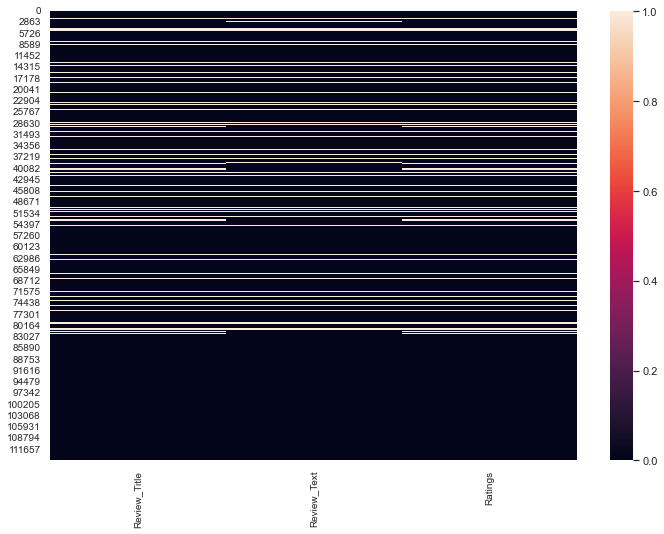

In [8]:
# Let's visualize the null values clearly in dataset using heat map

sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Replacing Nan values by using Imputation Method

In [9]:
#Checking the mode of Review_Title column

df["Review_Title"].mode()

0    Wonderful
Name: Review_Title, dtype: object

In [10]:
#Checking the mode of Review_Text column

df["Review_Text"].mode()

0    Good
Name: Review_Text, dtype: object

In [11]:
#Checking the value counts of Ratings column

df.Ratings.value_counts()

5                     19085
5.0 out of 5 stars    16301
1.0 out of 5 stars    14598
4.0 out of 5 stars    14261
3.0 out of 5 stars    12313
2.0 out of 5 stars    10726
4                      6470
1                      2249
3                      2098
2                       779
Name: Ratings, dtype: int64

In [12]:
#Checking the mode

df["Ratings"].mode()

0    5
Name: Ratings, dtype: object

In [13]:
#Replacing naa values with there mode as all the columns are categorical

df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [14]:
# Checking for null values again

print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    0
Review_Text     0
Ratings         0
dtype: int64


In [15]:
# Checking the unique value count of target column

df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '5', '4.0 out of 5 stars', '4', '3', '1',
       '2'], dtype=object)

In [16]:
# Replacing the string entries in target column

df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [17]:
# Checking the unique value count of target column again

df['Ratings'].unique()

array([2, 3, 1, 5, 4])

# Now let's combine Review_Title and Review_Text to make a single column Review:

In [18]:
# Combining Review text and title

df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [19]:
#let's have a look into our dataset

df

,Review_Title,Review_Text,Ratings,Review
0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2,Think twice before going for it \n &nbsp;Pros...
1,Overpriced,\n Overpriced for this mediocre product with ...,2,Overpriced \n Overpriced for this mediocre pr...
2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3,Build quality is not as good as shown in the A...
3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3,Speed and Visuals makes this a power machine! ...
4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3,Overpriced and unreliable \n For just i5 11th...
...,...,...,...,...
114486,Waste of money!,It is worse screen was damaged,1,Waste of money! It is worse screen was damaged
114487,Nice,Good,3,Nice Good
114488,Could be way better,Poor quality...,2,Could be way better Poor quality...
114489,Just wow!,Good product,5,Just wow! Good product


In [20]:
# Dropping unnecessary column

df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

# Let's have a look into our Review column and see first 2 entries how the data looks:

In [21]:
# Checking data of first row in Review column

df['Review'][0]

"Think twice before going for it \n  &nbsp;Pros<br>-----<br>- Very light weight<br>- Screen brightness and clarity is awesome<br><br>Cons<br>------<br>- Speaker quality is horrible. Cannot use for calls at all. Crackling noise takes you to vinyl days.<br>- Body is not sturdy. The piece I received was slightly bent at the base, making the laptop wobble when I type.<br>- The bottom screw was hanging out with the thread gone due to incorrect tightening (so much for Japanese craftmanship)<br><br>Recommend to not purchase. It's not worth at this price point.\n"

In [24]:
# Checking data of second row in Review column

df['Review'][1]

'Overpriced \n  Overpriced for this mediocre product with no brand value, better to check out other products in reputed brands like dell, Hp, Asus\n'

# TEXT PROCESSING

In [25]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [26]:
# Changing all words to there Lowercase

df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations

df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [27]:
# Checking data of first row in Review column again

df['Review'][0]

'think twice before going for it    nbsppros   very light weight  screen brightness and clarity is awesome  cons   speaker quality is horrible cannot use for calls at all crackling noise takes you to vinyl days  body is not sturdy the piece i received was slightly bent at the base making the laptop wobble when i type  the bottom screw was hanging out with the thread gone due to incorrect tightening so much for japanese craftmanship  recommend to not purchase it is not worth at this price point '

In [28]:
# Checking data of second row in Review column again

df['Review'][1]

'overpriced    overpriced for this mediocre product with no brand value better to check out other products in reputed brands like dell hp asus '

# Removing Stop Words

In [29]:
! pip install nltk

In [30]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryanlohan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [32]:
# Checking the text data again

df['Review'][0]

'think twice going nbsppros light weight screen brightness clarity awesome cons speaker quality horrible cannot use calls crackling noise takes vinyl days body sturdy piece received slightly bent base making laptop wobble type bottom screw hanging thread gone due incorrect tightening much japanese craftmanship recommend purchase worth price point'

In [33]:
# Checking the text data again

df['Review'][1]

'overpriced overpriced mediocre product brand value better check products reputed brands like dell hp asus'

# LEMMATIZATION

In [34]:
#Initialising lemmatizer

lemmatizer = nltk.stem.WordNetLemmatizer()

In [35]:
#Defining functiom to convert nltk tag to wordnet tags

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [36]:
#defining function to lemmatize our text

def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aryanlohan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aryanlohan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aryanlohan/nltk_data...


True

# Text Normalization--Standardization

In [41]:
#Noice removal

def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [42]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [43]:
# Checking the text data again

df['Review'][0]

'think twice going nbsppros light weight screen brightness clarity awesome cons speaker quality horrible cannot use calls crackling noise takes vinyl days body sturdy piece received slightly bent base making laptop wobble type bottom screw hanging thread gone due incorrect tightening much japanese craftmanship recommend purchase worth price point'

In [44]:
# Checking the text data again

df['Review'][1]

'overpriced overpriced mediocre product brand value better check products reputed brands like dell hp asus'

# VISUALIZATION

In [45]:
# Creating column for word counts in the text

df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,49,think twice going nbsppros light weight screen...
1,15,overpriced overpriced mediocre product brand v...
2,112,build quality good shown ad meet expectations ...
3,16,speed visuals makes power machine speakers sou...
4,29,overpriced unreliable i th gen laptop way over...


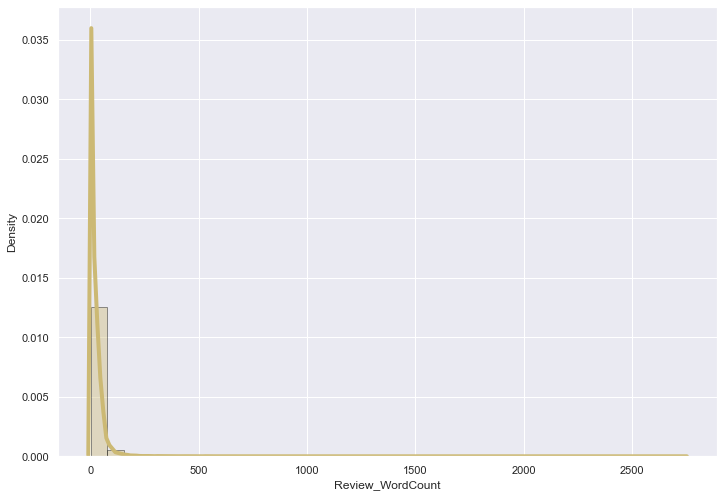

In [46]:
# density plot and histogram of Review word count

sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [47]:
# Creating column for character counts in the text

df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,347,think twice going nbsppros light weight screen...
1,105,overpriced overpriced mediocre product brand v...
2,757,build quality good shown ad meet expectations ...
3,119,speed visuals makes power machine speakers sou...
4,199,overpriced unreliable i th gen laptop way over...


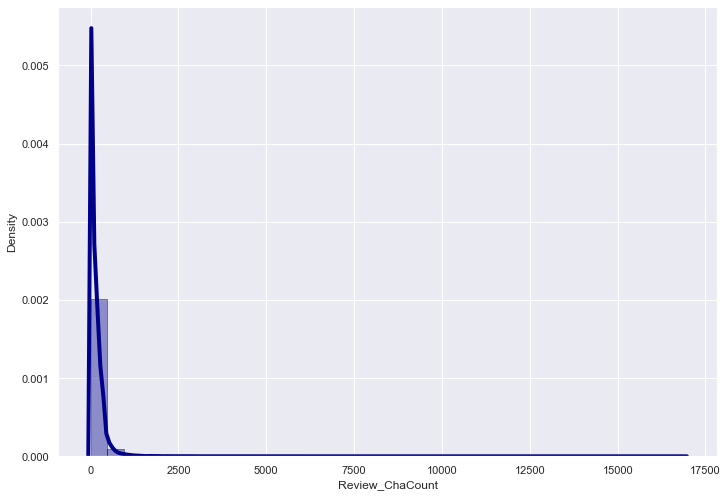

In [48]:
# density plot and histogram of all character count

sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Removing Outliers

In [49]:
#Checking the shape of the dataset

df.shape

(114491, 4)

In [50]:
# Applying zscore to remove outliers

from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(112973, 4)

# Plotting histograms for word count and character counts again after removing outliers:

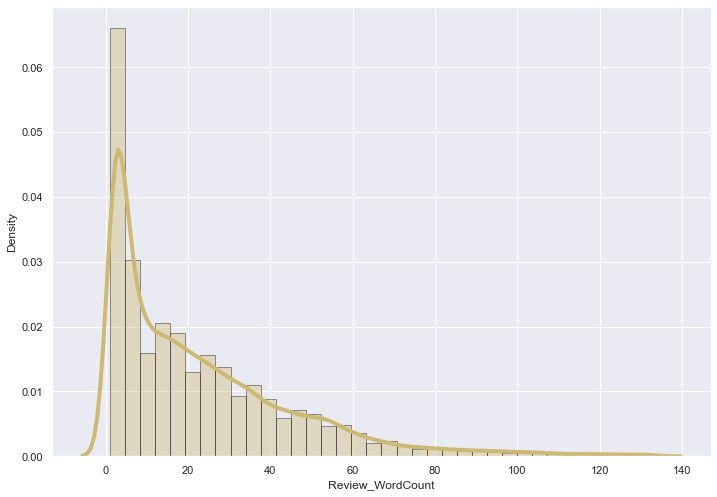

In [51]:
# density plot and histogram of Review word count

sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

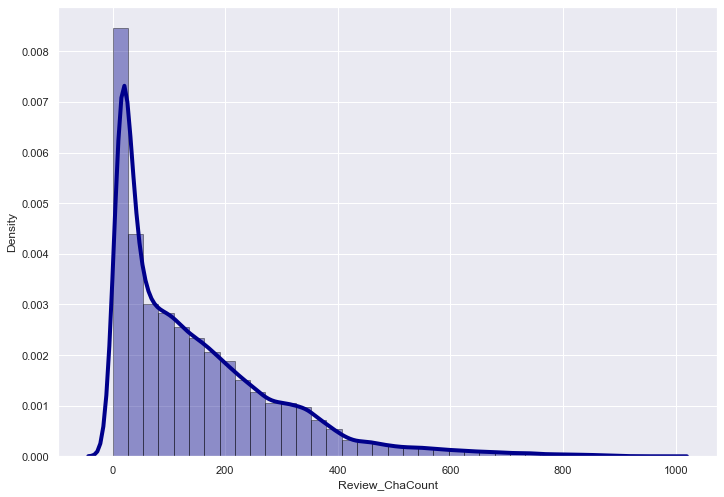

In [52]:
# density plot and histogram of all character count

sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [53]:
#function to plot most frequent terms

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

In [54]:
#function to plot least frequent terms

def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

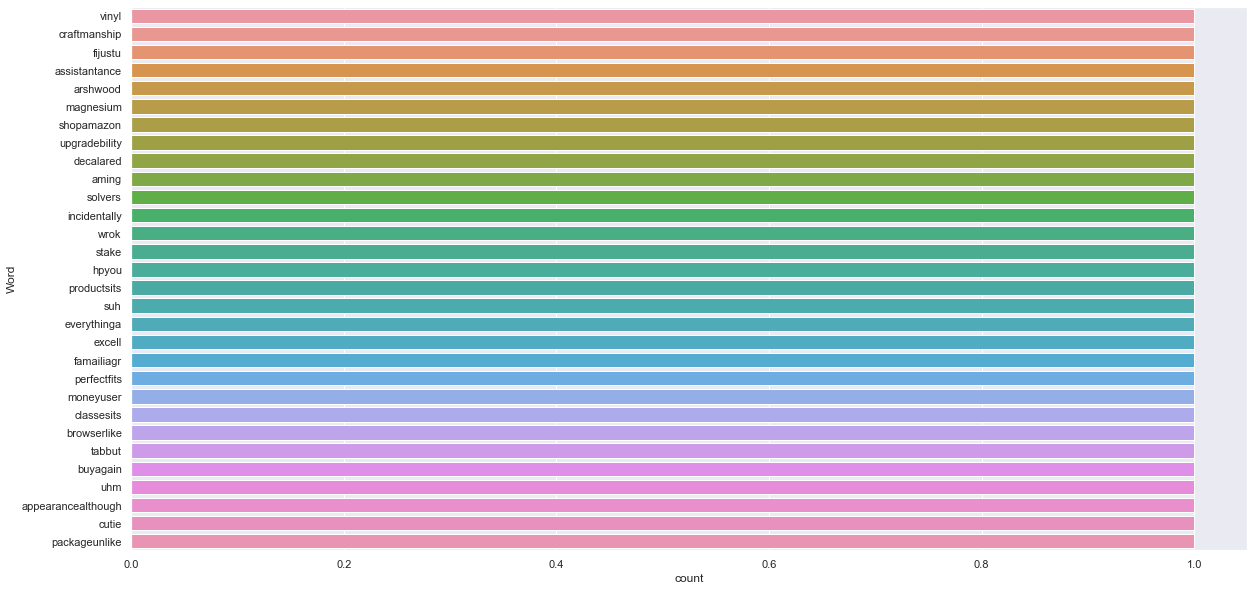

In [55]:
rare_words(df['Review'])

In [56]:
!pip install WordCloud

In [57]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

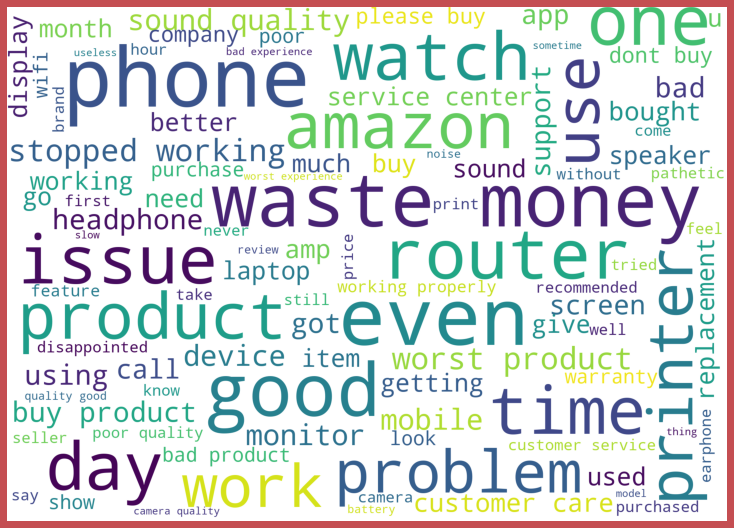

In [58]:
#Let's plot the loud words with Rating 1

from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

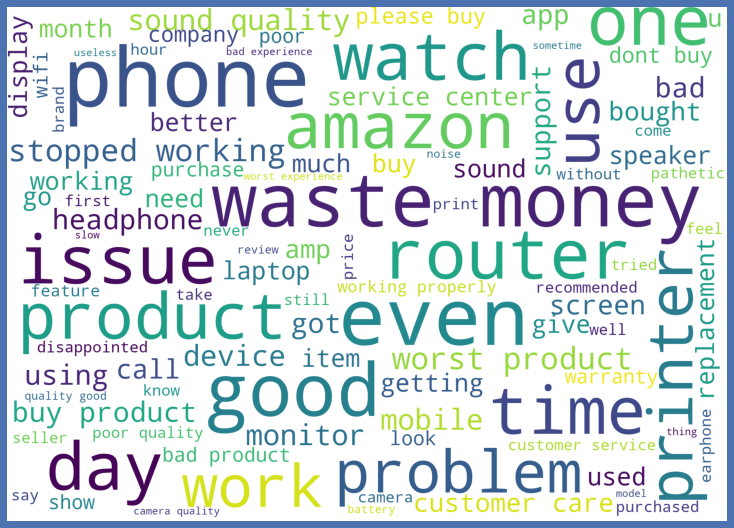

In [59]:
#Let's plot the loud words with Rating 2

from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

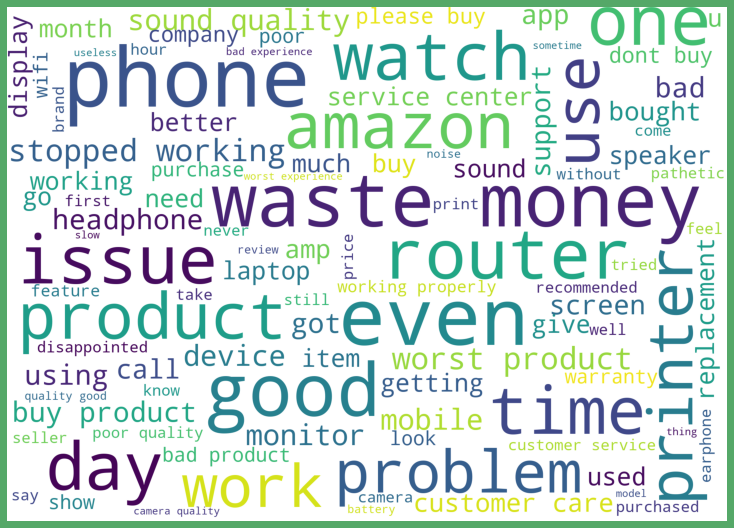

In [60]:
#Let's plot the loud words with Rating 3

from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

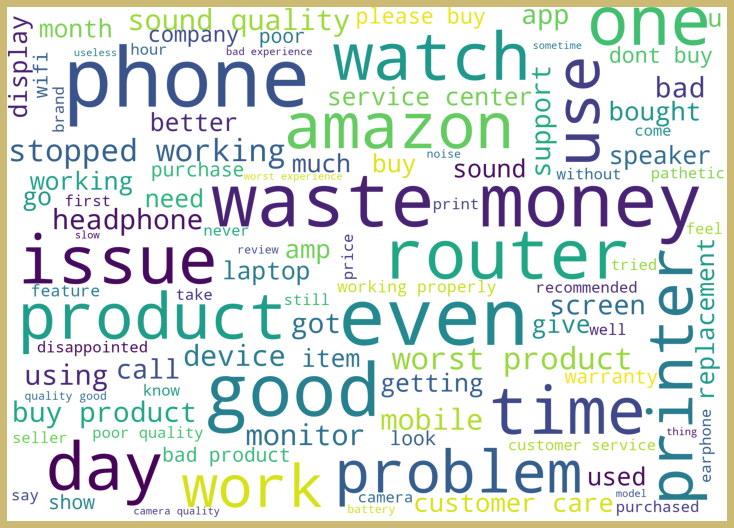

In [61]:
#Let's plot the loud words with Rating 4

from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

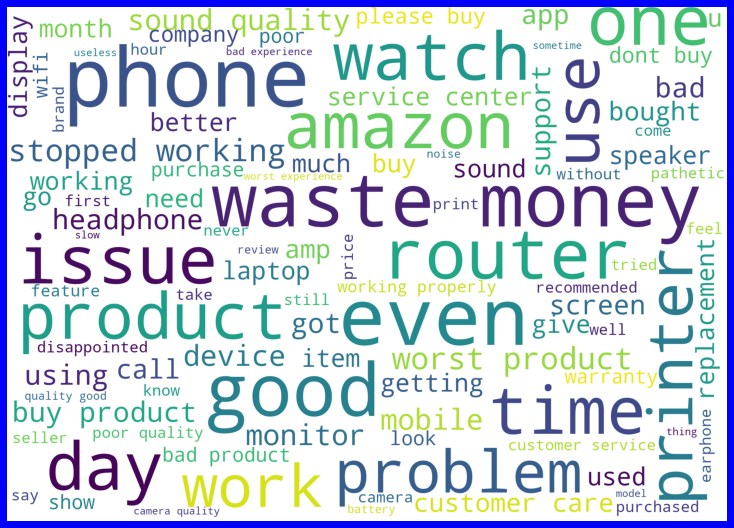

In [62]:
#Let's plot the loud words with Rating 5

from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [63]:
#Checking the value counts of Ratings column

df.Ratings.value_counts()

5    50245
4    20378
1    16687
3    14258
2    11405
Name: Ratings, dtype: int64

# MODEL BUILDING AND EVALUATION

In [64]:
# Separating feature and label

x = df['Review']
y = df['Ratings']

# CONVERTING TEXT DATA INTO VECTORS

In [65]:
#using the n_gram tfidf vectorizer(Word vectors)

from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [66]:
#Character vectorizer

char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [67]:
#I will combine both word vectors and character vectors as input for our model

from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

# SPLITTING THE DATA INTO TRAIN AND TEST

In [68]:
# Splitting train and test data

seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

# DATA BALANCING

In [69]:
#lets check the shapes of traning and test data

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (84729, 150000)
x_test (28244, 150000)
y_train (84729,)
y_test (28244,)


In [70]:
#Checking the value counts of Ratings column

y.value_counts()

5    50245
4    20378
1    16687
3    14258
2    11405
Name: Ratings, dtype: int64

In [71]:
#Checking the number of classes before fit

from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 37733, 4: 15211, 1: 12583, 3: 10674, 2: 8528})


In [72]:
# Oversample and plot imbalanced dataset with SMOTE

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37733, 2: 37733, 3: 37733, 4: 37733, 5: 37733})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 37733, 4: 15211, 1: 12583, 3: 10674, 2: 8528})
The number of classes after fit Counter({5: 37733, 2: 37733, 3: 37733, 1: 37733, 4: 37733})
